In [2]:
import numpy as np
import random
import matplotlib.pyplot as plt
from scipy.special import comb 

## Initialize Dataset \& Weights

In [3]:
def init_(p, n):

    # Generate dataset with samples that follow Gaussian distribution
    mu = np.zeros(p) 
    sigma = np.ones(p)
    # No correlation between features
    cov = np.eye(p)
    x = np.random.multivariate_normal(mu, cov, n).T

    # For the P points, randomly assign a label (either +1 or -1) with equal probability
    s = random.choices( [1, -1], weights=[1/2, 1/2], k=p )
    s = np.array(s)

    # Initialize weights for a single neuron and each feature
    w = np.zeros(n)

    return x, s, w

## Plot the probability of being linearly separable 

In [4]:
def successfulPlot(A, prob):
    
    """ Plots the fraction Pls = C(P, N)/2^P of linearly separable functions versus α = P/N
    
    :param A: The ratio of P to N
    :param prob: The probability of being linearly separable 

    """
    
    plt.suptitle("The fraction Pls = C(P, N)/2^P of linearly separable functions versus α = P/N", fontsize=14,\
                 fontweight="bold")
    plt.xlabel("a = P/N")
    plt.ylabel("C(P,N) / 2^P")
    plt.plot(A, prob)

## Rosenblatt Perceptron Algorithm Implementation

In [5]:
def rosenblattPerceptron(x, s, w, P): 
    for i in range(epochs):

        E = np.array([])

        for j in range(P):
            # Predict the labels
            y_pred = np.sign(x[j].dot(w.T))
            E = np.append(E, x[j].dot(w.T)*s[j])

            # Update weights in case predicted value != true value
            if (E[j] <= 0):
                w = w + (x[j] * s[j])/N

        # Stop iterating when all predicted values equal true values
        if (np.all(E > 0)):
            print("All instances are predicted correctly")
            break

    print("The accuracy of the model for N =", +N, "and P =", +P, "equals:", +np.mean(E > 0), "\n")

## The Capacity of a Hyperplane

In [6]:
# Number of features (columns)
N = 40
# The different ratios of P to N
A = np.arange(0.75, 3.25, 0.25)
# Initialize number of epochs
epochs = 500
prob = []

for a in A:
    # Number of training samples (rows)
    P = int(a*N)    
    # Initialize training samples
    x, s, w = init_(P, N)
    # Run Rosenblatt-Perceptron algorithm
    rosenblattPerceptron(x, s, w, P)
        
    if ( P<=N ):
        prob.append(1)
    else:
        q = []
        for i in range(N):
            q.append( comb(P-1, i) )
        prob.append( 2**(1-P) * np.sum(q) )

All instances are predicted correctly
The accuracy of the model for N = 40 and P = 30 equals: 1.0 

All instances are predicted correctly
The accuracy of the model for N = 40 and P = 40 equals: 1.0 

All instances are predicted correctly
The accuracy of the model for N = 40 and P = 50 equals: 1.0 

All instances are predicted correctly
The accuracy of the model for N = 40 and P = 60 equals: 1.0 

The accuracy of the model for N = 40 and P = 70 equals: 0.8285714285714286 

The accuracy of the model for N = 40 and P = 80 equals: 0.8375 

The accuracy of the model for N = 40 and P = 90 equals: 0.7444444444444445 

The accuracy of the model for N = 40 and P = 100 equals: 0.61 

The accuracy of the model for N = 40 and P = 110 equals: 0.5454545454545454 

The accuracy of the model for N = 40 and P = 120 equals: 0.45 



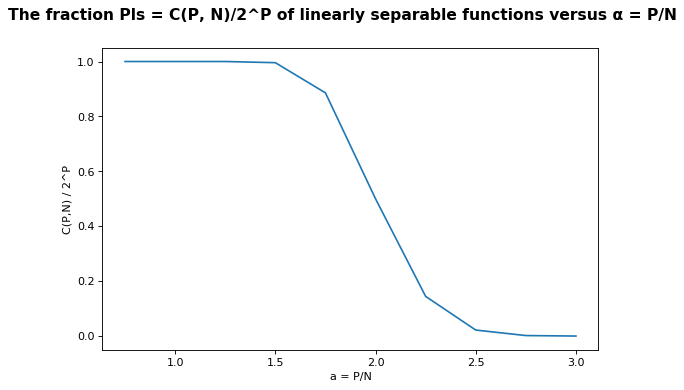

In [7]:
# Plot function
plt.figure(figsize=(8, 5), dpi=80)
successfulPlot(A, prob)
plt.show()

### Extension-1

Observe the behavior of $Q_{l.s.}(α)$ for different system sizes $N$. Does it approach a step function with increasing $N$, as predicted by the theory? To this end, repeat the above experiments
for several larger values of $N$. For this study, you might want to consider a limited range of
$α-$values, e.g., $1.5 \leq α\leq 2.5$. and perhaps consider a smaller increment of $α$ in this interval.

All instances are predicted correctly
The accuracy of the model for N = 5 and P = 5 equals: 1.0 

All instances are predicted correctly
The accuracy of the model for N = 5 and P = 6 equals: 1.0 

All instances are predicted correctly
The accuracy of the model for N = 5 and P = 7 equals: 1.0 

The accuracy of the model for N = 5 and P = 8 equals: 0.375 

All instances are predicted correctly
The accuracy of the model for N = 5 and P = 10 equals: 1.0 

The accuracy of the model for N = 5 and P = 11 equals: 0.36363636363636365 

All instances are predicted correctly
The accuracy of the model for N = 5 and P = 12 equals: 1.0 

All instances are predicted correctly
The accuracy of the model for N = 5 and P = 13 equals: 1.0 

All instances are predicted correctly
The accuracy of the model for N = 20 and P = 20 equals: 1.0 

All instances are predicted correctly
The accuracy of the model for N = 20 and P = 25 equals: 1.0 

All instances are predicted correctly
The accuracy of the model for N 

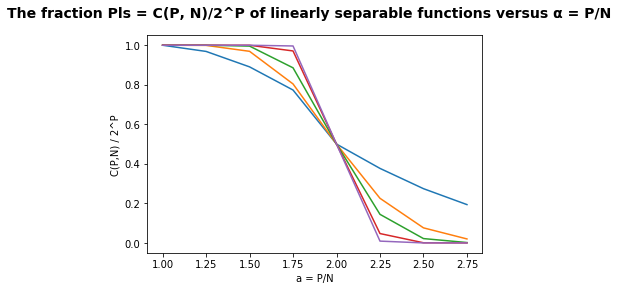

In [9]:
# Number of features (columns)
N = [5, 20, 40, 100, 200]
# The different ratios of P to N
A = np.arange(1.0, 3.0, 0.25)
# Initialize number of epochs
epochs = 500


for N in N:
    prob = []
    for a in A:
        # Number of training samples (rows)
        P = int(a*N)    
        # Initialize training samples
        x, s, w = init_(P, N)
        # Run Rosenblatt-Perceptron algorithm
        rosenblattPerceptron(x, s, w, P)

        if ( P<=N ):
            prob.append(1)
        else:
            q = []
            for i in range(N):
                q.append( comb(P-1, i) )
            prob.append( 2**(1-P) * np.sum(q) )
            
    successfulPlot(A, prob)

#plt.legend(loc='best')
plt.show()